#  DETECTION OF DIABETIC RETINOPATHY Using Deep-Learning (Experimentation) 

# About Dataset:
## This dataset is a unified of the Eyepacs,Aptos,Aptos(Gaussian Filtered) and Messidor Diabetic Retinopathy Datasets
## Consisting of a total of 92,501 jpg files, was created by combining the images in the public databases mentioned above.

# EDA(to analyze the dataset distribution,checking image dimensions and detecting corrupted images)

In [1]:
import cv2 
import numpy as np
import os
import random
import matplotlib.pyplot as plt

In [2]:
def explore_dataset(base_path):
    """Perform basic expolratory data anlysis (EDA) on the dataset"""
    datasets = ['train','test','val']
    stages = ['0','1','2','3','4']
    num_images_per_stage= {stage: 0 for stage in stages}
    image_shapes = []
    corrupted_images = 0

    for dataset in datasets:
        dataset_path = os.path.join(base_path,dataset)
        for stage in stages:
            stage_path = os.path.join(dataset_path, stage)
            image_files = os.listdir(stage_path)
            num_images_per_stage[stage] += len(image_files)

        # collecting image shapes
        if image_files:
            img_sample = cv2.imread(os.path.join(stage_path,image_files[0]))
            if img_sample is not None:
                image_shapes.append(img_sample.shape)

        # checking for corrupted images
        for img_file in image_files:
            img_path = os.path.join(stage_path, img_file)
            img = cv2.imread(img_path)
            if img is None:
                corrupted_images += 1
                print(f'Corrupted image found:{img_path}')

    # plotting distribution of images per stage
    plt.figure(figsize=(8,5))
    plt.bar(num_images_per_stage.keys(),num_images_per_stage.values(),color='skyblue')
    plt.xlabel('Diabetic Retinopathy Stage')
    plt.ylabel('Number of Images')
    plt.title('Distribution of Images Across Stages')
    plt.show()

    print("Image Distribution per stage:")
    for stage,count in num_images_per_stage.items():
        print(f"Stage{stage}: {count} images")

    # Display unique image dimensions 
    unique_shapes = set(image_shapes)
    print("Unique image dimensions in dataset:",unique_shapes)
    print(f'Total corrupted images found:{corrupted_images}')

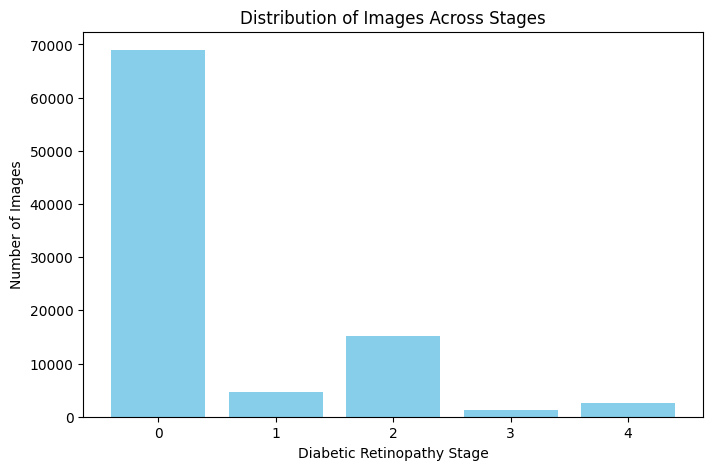

Image Distribution per stage:
Stage0: 68953 images
Stage1: 4634 images
Stage2: 15151 images
Stage3: 1259 images
Stage4: 2504 images
Unique image dimensions in dataset: {(1958, 2588, 3), (224, 224, 3)}
Total corrupted images found:0


In [3]:
base_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\data'
# performing EDA on the unified dataset
explore_dataset(base_path)

# Pre-Processing of Retina Images
## Preprocessing is crucial for improving the quality of images and enhancing the performance of deep learning models.
## Since our dataset contains retina images for diabetic retinopathy detection & classification,
## the following preprocessing steps are followed:
### -Converting BGR to RGB: OpenCV loads the images in BGR format,but deep learning models     except RGB format.
### -Image Resizing: Standardizes the input size for deep learning models.(224*224)
### -Converting to Grayscale: RGB to grayscale to remove color information.This helps in        focusing on intensity variations, which are useful for medical imaging.
### -Applying CLAHE : This is used for enhancing the local contrast, and also for               improving visibility of structures in images.
### -Converting GrayScale Back to RGB (3 channels Required by Models): Many Deep Learning       models expect 3-channel images and since we processed the image in grayscale, we           duplicate it across all three channels to maintain the expected shape.
### -Normalize Pixel Values (scaling it between 0 and 1): This helps in stabilizing neural      network training by keeping values within a small range.

# This Pre-Processing steps were particularly important and useful where fine details like microaneurysms and hemorrhages need to be highlighted.

# Dislpaying Random Retina images from the dataset

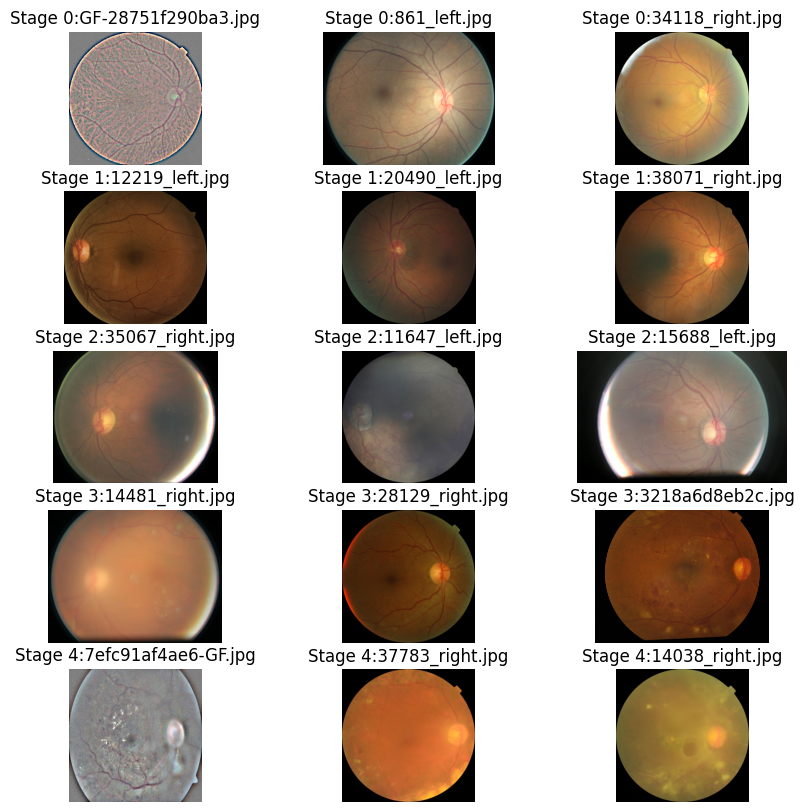

In [4]:
def load_random_images(base_path,num_images=3):
    """Loading Three Random Sample Images from Each Stage Folder and Displaying them."""
    images = []
    fig,axes = plt.subplots(5,num_images,figsize=(10,10))
    for i, stage in enumerate(['0','1','2','3','4']):
        stage_path = os.path.join(base_path,stage)
        image_files = os.listdir(stage_path)
        random_files = random.sample(image_files, min(num_images,len(image_files)))
        for j, img_file in enumerate(random_files):
            img_path = os.path.join(stage_path,img_file)
            img = cv2.imread(img_path)
            if img is not None:
                images.append((img, img_file, stage))
                axes[i,j].imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # converting from BGR to RGB
                axes[i,j].set_title(f'Stage {stage}:{img_file}')
                axes[i,j].axis('off')
    plt.show()
    #return 0

base_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\data\train'
load_random_images(base_path)

# 1) Loading the Dataset

In [5]:
import shutil
def loading_dataset(base_path,output_path):
    datasets = ['train','test','val']
    stages = ['0','1','2','3','4']
    os.makedirs(output_path,exist_ok=True)

    for stage in stages:
        stage_output_path = os.path.join(output_path,stage)
        os.makedirs(stage_output_path,exist_ok=True)

        for dataset in datasets:
            stage_path = os.path.join(base_path,dataset,stage)
            if not os.path.exists(stage_path):
                print(f'Warning :{stage_path} does not exist. Skipping.')
                continue

            for img_file in os.listdir(stage_path):
                src_path = os.path.join(stage_path, img_file)
                dst_path = os.path.join(stage_output_path, img_file)
                shutil.copy(src_path,dst_path)
    print(f'Dataset combined into {output_path}')


base_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\data'
unified_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\dataset'
loading_dataset(base_path,unified_path)

Dataset combined into C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\dataset


# 2) Converting Images from BGR to RGB 

In [6]:
def convert_bgr_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 3) Resizing the Images(224*224)

In [7]:
def resize_image(image, size=(224,224)):
    return cv2.resize(image,size, interpolation = cv2.INTER_AREA)

# 4) Converting Images to GrayScale

In [8]:
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 5) applying CLAHE to Images

In [9]:
def apply_clahe(image):
    clahe = cv2.createCLAHE(clipLimit=3.0,tileGridSize=(8,8))
    return clahe.apply(image)

# 6) Converting GrayScale Images back to RGB format

In [10]:
def convert_grayscale_to_rgb(image):
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# 7) Normalizing the Images

In [11]:
def normalize_image(image):
    return image/255.0

# 8) Performing the Pre-Processing on the sample images for comparison

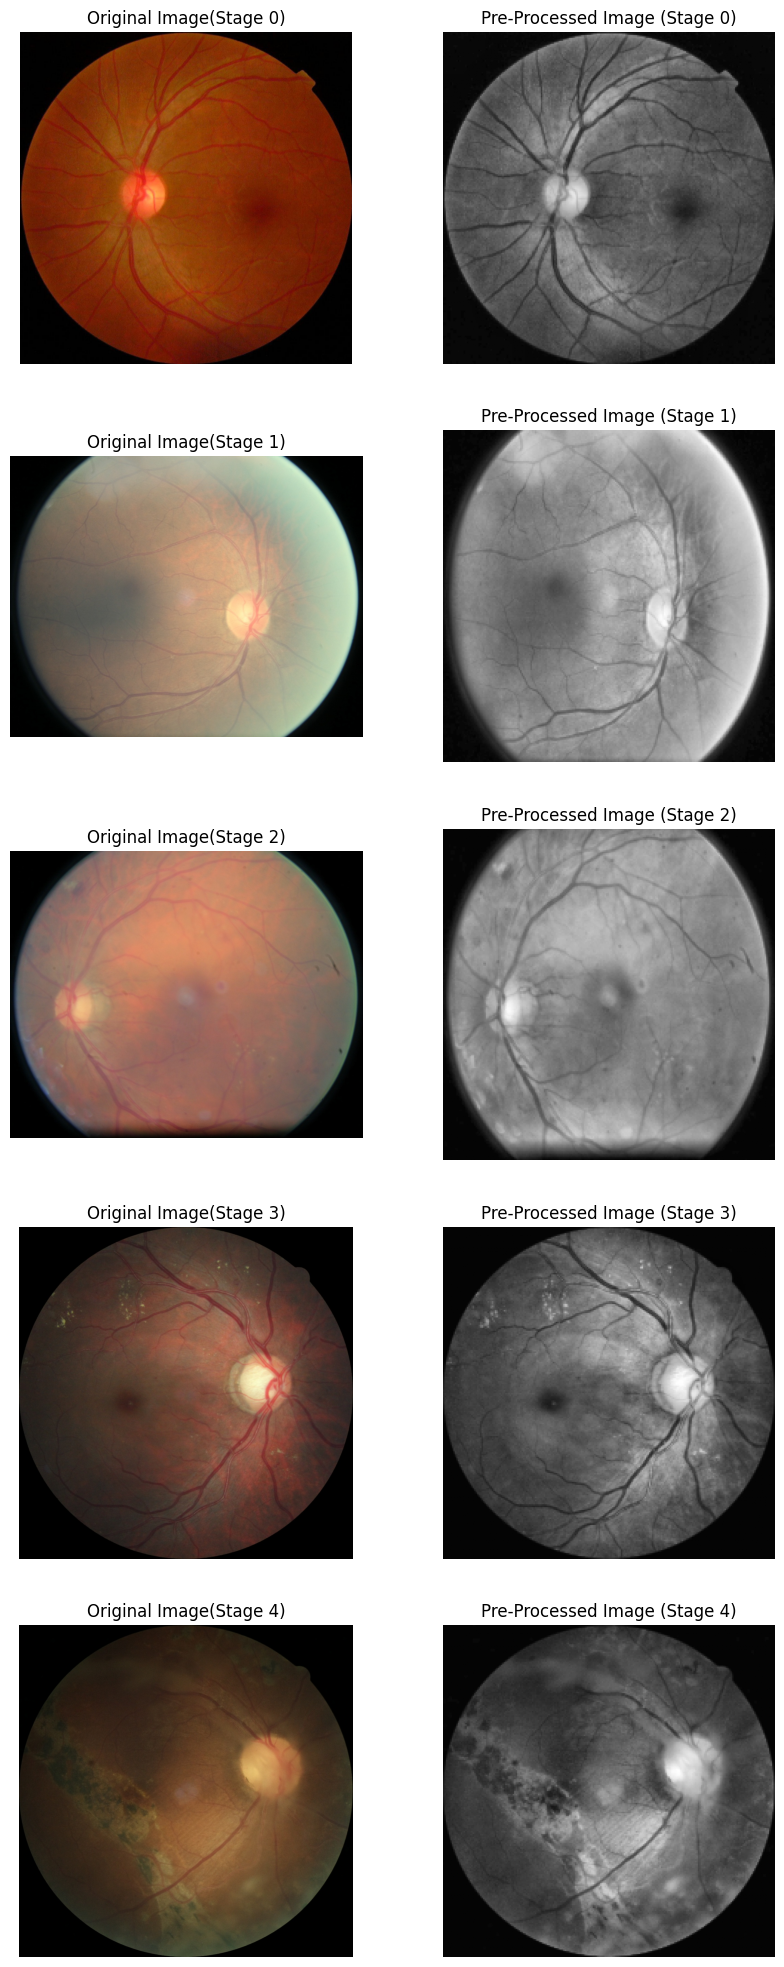

In [17]:
def preprocess_sample_images(dataset_path):
    """Applying Preprocessing to 2 images from each stage and display original vs preprocessed images"""
    stages = ['0','1','2','3','4']
    image_list =[]

    for stage in stages:
        stage_path = os.path.join(dataset_path,stage)
        if not os.path.exists(stage_path):
            print(f'Warning: {stage_path} does not exist. Skipping')
            continue

        image_files = random.sample(os.listdir(stage_path),min(1,len(os.listdir(stage_path))))
        for img_file in image_files:
            img_path = os.path.join(stage_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                image_list.append((img, stage))

    fig,axes = plt.subplots(len(image_list),2, figsize=(10,5 * len(image_list)))

    processed_images = []
    for i, (image,stage) in enumerate(image_list):
        rgb_img = convert_bgr_to_rgb(image)
        resized = resize_image(rgb_img)
        gray_img = convert_to_grayscale(resized)
        enhanced = apply_clahe(gray_img)
        restored_rgb = convert_grayscale_to_rgb(enhanced)
        normalized_img = normalize_image(restored_rgb)
        processed_images.append(normalized_img)
    
        # Dispaying original VS Pre-Processed Image
        axes[i,0].imshow(rgb_img)
        axes[i,0].set_title(f'Original Image(Stage {stage})')
        axes[i,0].axis('off')
    
        axes[i,1].imshow(normalized_img)
        axes[i,1].set_title(f'Pre-Processed Image (Stage {stage})')
        axes[i,1].axis('off')

    plt.show()
    #return processed_images


# Example usage for a sample images
unified_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\dataset'
preprocess_sample_images(unified_path)

# Now Applying the pre-processing steps to all the images and saving them in a preprocessed folder

In [18]:
def preprocess_and_save(dataset_path, output_path):
    os.makedirs(output_path, exist_ok=True)
    stages = ['0','1','2','3','4']

    for stage in stages:
        stage_input_path = os.path.join(dataset_path, stage)
        stage_output_path = os.path.join(output_path, stage)
        os.makedirs(stage_output_path, exist_ok=True)

        if not os.path.exists(stage_input_path):
            print(f'Warning: {stage_input_path} does not exist. Skipping.')
            continue

        for img_file in os.listdir(stage_input_path):
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                rgb_img = convert_bgr_to_rgb(img)
                resized = resize_image(rgb_img)
                gray_img = convert_to_grayscale(resized)
                enhanced = apply_clahe(gray_img)
                restored_rgb = convert_grayscale_to_rgb(enhanced)
                normalized_img = (normalize_image(restored_rgb)*255).astype(np.uint8)
                output_img_path = os.path.join(stage_output_path, img_file)
                cv2.imwrite(output_img_path, cv2.cvtColor(normalized_img,cv2.COLOR_RGB2BGR))

    print(f'Pre-Processing completed. Processed images saved to {output_path}')

In [19]:
unified_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\dataset'
output_path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

preprocess_and_save(unified_path,output_path)

Pre-Processing completed. Processed images saved to C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed


# when we looked on our preprocessed images we found that there were many dark images and this images can negatively impact our deep learning model because they may introduce unwanted biases and reduce the model's ability to learn meangiful features.

# Solution :
## The solution for the dark image was to Apply gamma correction on them  which can help brighten images.

# But Before Applying Gamma Correction We need to identify darker images 
## And in order to do this we need to check the average brightness of each image and only enhance the ones below a certain threshold.

# Finding Darker Images 

In [41]:
def find_images_within_range(image, lower_threshold=7,upper_threshold=35):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    return lower_threshold <= mean_brightness <= upper_threshold , mean_brightness

In [42]:
def find_sample_images(input_path,lower_threshold=7, upper_threshold=35, num_images=10):
    stages = ['0','1','2','3','4']
    dark_images = []

    for stage in stages:
        stage_input_path = os.path.join(input_path, stage)
        if not os.path.exists(stage_input_path):
            print(f'Warning: {stage_input_path} does not exist. Skipping')
            continue

        image_files = os.listdir(stage_input_path)
        for img_file in image_files:
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_dark, brightness = find_images_within_range(img, lower_threshold, upper_threshold)
                if is_dark:
                    dark_images.append((img,stage,brightness))
                    if len(dark_images) >= num_images:
                        break

        if len(dark_images) >= num_images:
            break

    if not dark_images:
        print('No Dark images found')
        return

    fig, axes = plt.subplots(len(dark_images),1,figsize=(8,5 * len(dark_images)))

    for i, (image,stage,brightness) in enumerate(dark_images):
        axes[i].imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'Dark Image (Stage{stage}) - Brightness: {brightness:.2f}')
        axes[i].axis('off')

    plt.show()
    print('Displayed dark images from the Preprocessed Dataset')

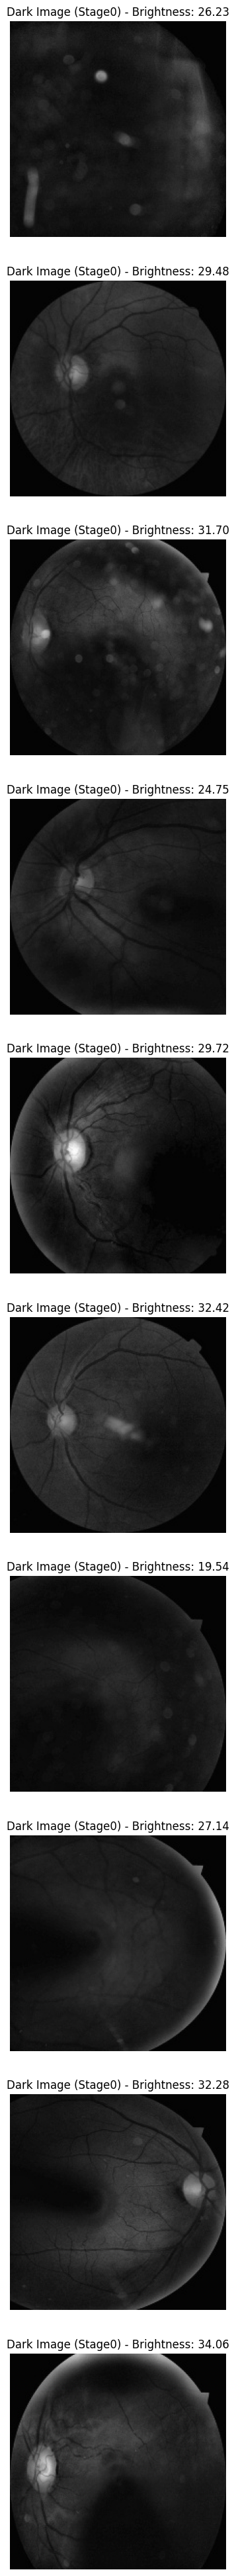

Displayed dark images from the Preprocessed Dataset


In [43]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'
find_sample_images(path,lower_threshold=7,upper_threshold=35, num_images=10)

# Here by iteratively checking the image within some brightness ranges we came to know that the images which have the brightness less than 35 are found to be dark images so we will apply gamma correction to only those images

In [51]:
def apply_gamma_correction(image,gamma=1.5):
    inv_gamma = 1.0/ gamma
    table = np.array([(i/255.0)** inv_gamma * 255 for i in np.arange(0,256)]).astype('uint8')
    return cv2.LUT(image, table)

In [52]:
def is_image_dark(image, threshold=35):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    mean_brightness = np.mean(gray)
    return mean_brightness < threshold, mean_brightness

# Testing Gamma Correction on Sample Images 

In [53]:
def test_gamma_correction(input_path,gamma=1.5, num_images=5,brightness_threshold=35):
    stages = ['0','1','2','3','4']
    sample_images = []

    for stage in stages:
        stage_input_path = os.path.join(input_path, stage)
        if not os.path.exists(stage_input_path):
            print(f'Warning:{stage_input_path} does not exist. Skipping.')
            continue

        image_files = os.listdir(stage_input_path)
        for img_file in image_files:
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_dark, brightness = is_image_dark(img,brightness_threshold)
                if is_dark:
                    sample_images.append((img,stage,brightness))
                    if len(sample_images) >= num_images:
                        break

        if len(sample_images) >= num_images:
            break

    if not sample_images:
        print('No Dark Images Found in the Sample.')
        return

    fig,axes = plt.subplots(len(sample_images),2, figsize=(10,5 * len(sample_images)))

    for i, (image, stage, brightness) in enumerate(sample_images):
        enhanced_img = apply_gamma_correction(image,gamma)

        axes[i,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i,0].set_title(f'Original Dark Images (stage {stage}) - Brightness: {brightness:.2f}')
        axes[i,0].axis('off')

        axes[i,1].imshow(cv2.cvtColor(enhanced_img, cv2.COLOR_BGR2RGB))
        axes[i,1].set_title(f'Gamma Corrected (Stage {stage})')
        axes[i,1].axis('off')

    plt.show()
    print('Displayed dark images before and after gamma correction')

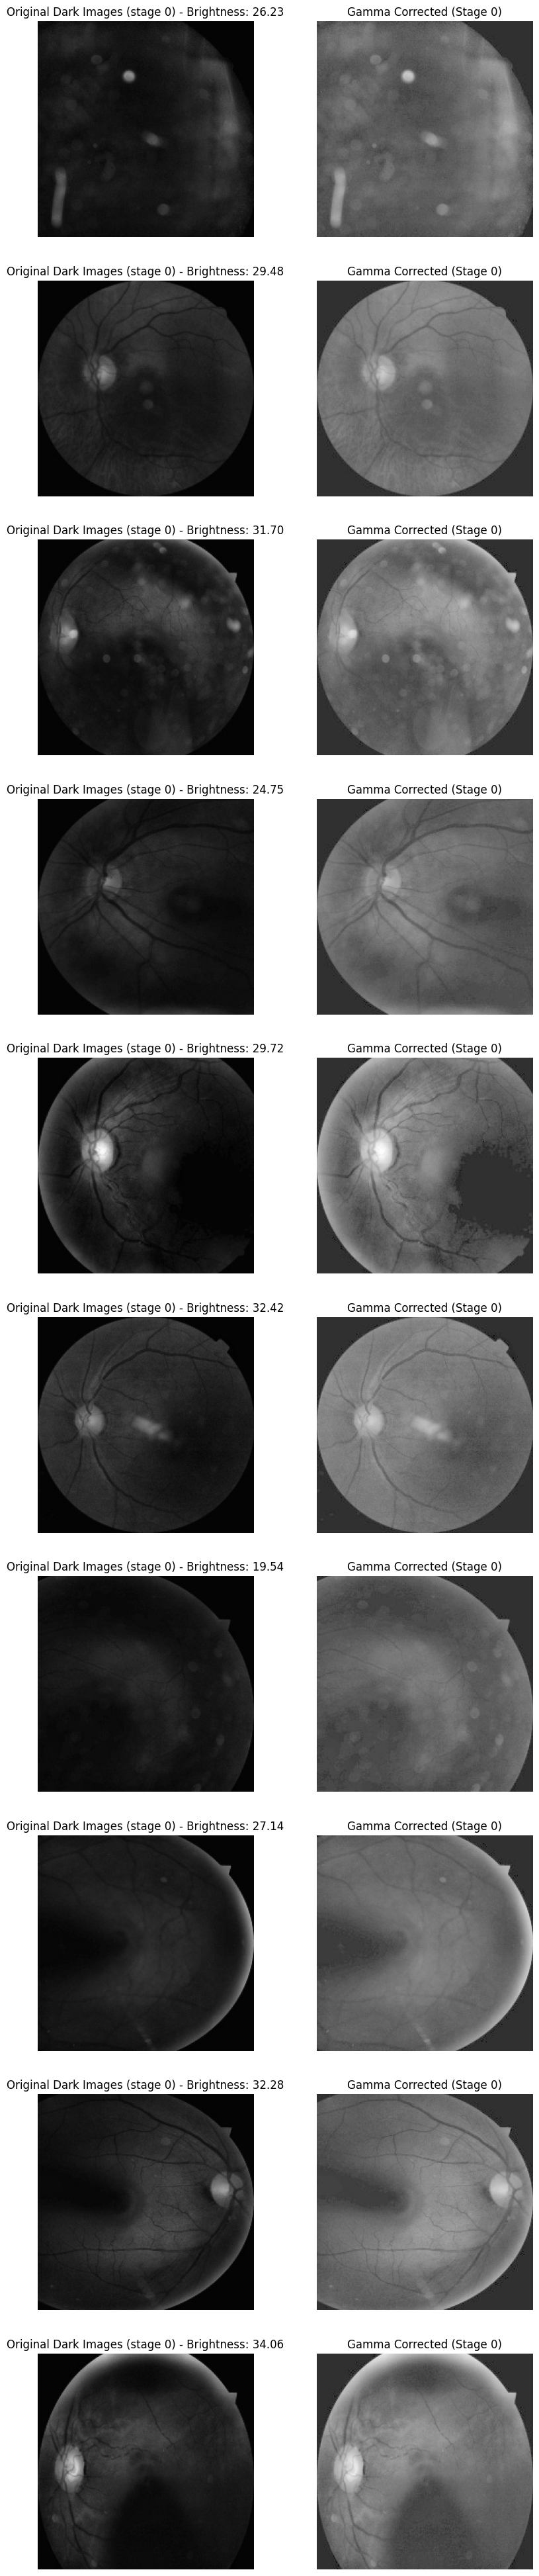

Displayed dark images before and after gamma correction


In [61]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

test_gamma_correction(path,gamma=2.5,num_images=10,brightness_threshold=35)

# Applying Gamma Correction to all Dark Images

In [66]:
def apply_gamma_to_dark_images(input_path, gamma=2.5, brightness_threshold=35):
    stages = ['0','1','2','3','4']

    for stage in stages:
        stage_input_path = os.path.join(input_path,stage)
        if not os.path.exists(stage_input_path):
            print(f'Warning: {stage_input_path} does not exist. Skipping.')
            continue

        for img_file in os.listdir(stage_input_path):
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_dark, brightness = is_image_dark(img, brightness_threshold)
                if is_dark:
                    enhanced_img = apply_gamma_correction(img,gamma)
                    cv2.imwrite(img_path,enhanced_img) # overwrite the existing image
    print('Gamma correction applied to dark images and replaced in the same folder')

In [67]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

apply_gamma_to_dark_images(path,gamma=2.5,brightness_threshold=35)

Gamma correction applied to dark images and replaced in the same folder


# During the Process of Gamma Correction we came to know that there were some blur images
## So first we created a function to detect blur images(Laplacian varaince method) then apply sharpening method to fix them

In [1]:
def detect_blur(image, threshold=100):
    gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray,cv2.CV_64F).var()
    return variance < threshold, variance

In [5]:
def display_blurry_images(input_path, blur_threshold=100, num_images=10):
    stages=['0','1','2','3','4']
    blurry_images = []

    for stage in stages:
        stage_input_path = os.path.join(input_path, stage)
        if not os.path.exists(stage_input_path):
            print(f'Warning:{stage_input_path} does not exist. Skipping.')
            continue

        image_files = os.listdir(stage_input_path)
        for img_file in image_files:
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_blurry, variance = detect_blur(img, blur_threshold)
                if is_blurry:
                    blurry_images.append((img, stage, variance))
                    if len(blurry_images) >= num_images:
                        break
        if len(blurry_images) >= num_images:
            break

    if not blurry_images:
        print('No blurry images found in the sample')
        return

    fig, axes = plt.subplots(len(blurry_images), 1, figsize=(8,5 * len(blurry_images)))

    for i, (image, stage, variance) in enumerate(blurry_images):
        axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'Blurry Image (Stage {stage}) - Variance: {variance:.2f}')
        axes[i].axis('off')

    plt.show()
    print('Displayed Blurry Images Before Applying Sharpening.')

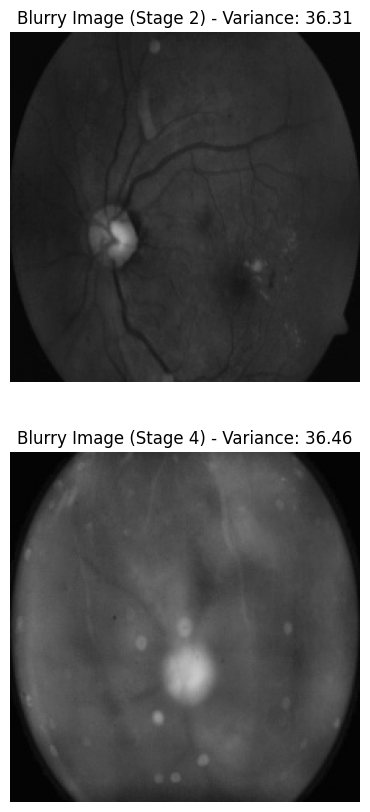

Displayed Blurry Images Before Applying Sharpening.


In [11]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

display_blurry_images(path, blur_threshold=40, num_images=10)

# Here by iteratively checking the images within some variance range we found that there are blurr images which were having variance greater than 35 and less than 120 and images which were having variance greater than 120 were found to be sharp/clear Images

## Before Applying the Sharpening Method to all blurry images We first applied it to Sample Images for Comparision

In [14]:
def detect_blur_image(image, lower_threshold=35, upper_threshold=120):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    variance = cv2.Laplacian(gray,cv2.CV_64F).var()
    return lower_threshold <= variance <= upper_threshold, variance

In [15]:
def sharpen_image(image):
    kernal = np.array([[0,-1,0],
                       [-1,5,-1],
                       [0,-1,0]])
    return cv2.filter2D(image, -1, kernal)

In [22]:
def display_sample_sharped_images(input_path, lower_threshold=35, upper_threshold=120, num_images=10):
    stages = ['0','1','2','3','4']
    blurry_images = []
    for stage in stages:
        stage_input_path = os.path.join(input_path, stage)
        if not os.path.exists(stage_input_path):
            print(f'warning: {stage_input_path} does not exist. Skipping')
            continue

        image_files = os.listdir(stage_input_path)
        for img_file in image_files:
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_blurry, variance = detect_blur_image(img, lower_threshold, upper_threshold)
                if is_blurry:
                    blurry_images.append((img, img_path, variance))
                    if len(blurry_images) >= num_images:
                        break

        if len(blurry_images) >= num_images:
            break

    if not blurry_images:
        print(f'No Blurry Images Found in the Sample.')
        return

    fig, axes = plt.subplots(len(blurry_images), 2, figsize=(10, 5 * len(blurry_images)))

    for i, (image, img_path, variance) in enumerate(blurry_images):
        sharp_img = sharpen_image(image)

        axes[i,0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axes[i,0].set_title(f'Original Blurry Image - Variance: {variance:.2f}')
        axes[i,0].axis('off')

        axes[i,1].imshow(cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB))
        axes[i,1].set_title('Sharpened Image')
        axes[i,1].axis('off')

    plt.show()
    print('Displayed Sample Blurry Images VS Sample Sharpened Images before applying it on all blurry images')

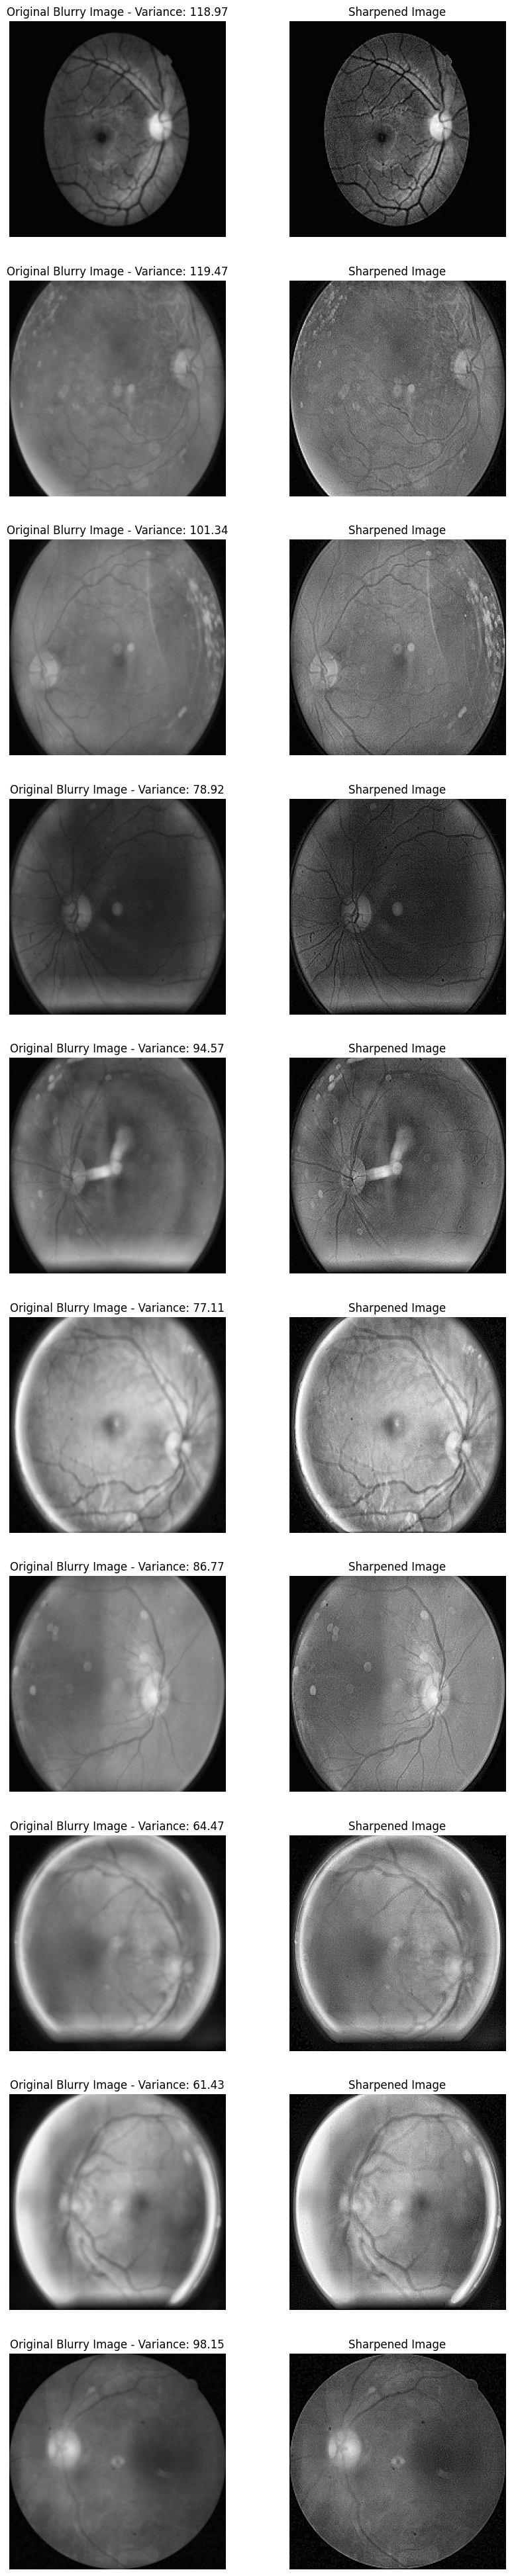

Displayed Sample Blurry Images VS Sample Sharpened Images before applying it on all blurry images


In [23]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

display_sample_sharped_images(path, lower_threshold=35, upper_threshold=120, num_images=10)

# Now Applying Shaperning To All Blurry Images and Saving them in the same directory by overwriting the existing ones

In [24]:
def fix_blurry_images(input_path, lower_threshold=35, upper_threshold=120):
    stages = ['0','1','2','3','4']

    for stage in stages:
        stage_input_path = os.path.join(input_path, stage)
        if not os.path.exists(stage_input_path):
            print(f'Warning: {stage_input_path} does not exists. Skipping.')
            continue

        for img_file in os.listdir(stage_input_path):
            img_path = os.path.join(stage_input_path, img_file)
            img = cv2.imread(img_path)
            if img is not None:
                is_blurry, variance = detect_blur_image(img, lower_threshold, upper_threshold)
                if is_blurry:
                    sharp_img = sharpen_image(img)
                    cv2.imwrite(img_path, sharp_img) # OverWrite existing Image
    print('Applied sharpening to all blurry images and replaced them.')

In [25]:
path = r'C:\Users\bhagi\Desktop\AI_ML_Projects\Early_Detection_of_Diabetic_Retinopathy\preprocessed'

fix_blurry_images(path, lower_threshold=35, upper_threshold=120)

Applied sharpening to all blurry images and replaced them.


# Pre-Processing Completed...🥳🕺 